In [1]:
import mne
import pandas as pd
import numpy as np


In [2]:
raw = mne.io.read_raw_edf('20250618170033_test_marker_update_9_EEG MAIN STUDY.edf', preload=True)


Extracting EDF parameters from c:\pc\iitmandi\EEG\20250618170033_test_marker_update_9_EEG MAIN STUDY.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 327499  =      0.000 ...   654.998 secs...


C:\Users\suryansh\AppData\Local\Temp\ipykernel_1932\1926002420.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf('20250618170033_test_marker_update_9_EEG MAIN STUDY.edf', preload=True)


In [3]:
raw

<RawEDF | 20250618170033_test_marker_update_9_EEG MAIN STUDY.edf, 35 x 327500 (655.0 s), ~87.5 MiB, data loaded>

In [4]:
raw.drop_channels(['X', 'Y', 'Z'])

<RawEDF | 20250618170033_test_marker_update_9_EEG MAIN STUDY.edf, 32 x 327500 (655.0 s), ~80.0 MiB, data loaded>

In [5]:
markers = pd.read_csv('20250618170033_test_marker_update_9_EEG MAIN STUDY (1).csv')
# Convert to MNE events array: each row = [sample, 0, event_id]
# Convert CSV markers to MNE events
events = []
for idx, marker_value in enumerate(markers['Marker']):
    sample = idx * 500  # Since 500Hz sampling
    events.append([sample, 0, marker_value])

events_array = np.array(events)


In [6]:
events

[[0, 0, 0],
 [500, 0, 0],
 [1000, 0, 0],
 [1500, 0, 0],
 [2000, 0, 0],
 [2500, 0, 0],
 [3000, 0, 0],
 [3500, 0, 0],
 [4000, 0, 0],
 [4500, 0, 0],
 [5000, 0, 0],
 [5500, 0, 0],
 [6000, 0, 0],
 [6500, 0, 0],
 [7000, 0, 0],
 [7500, 0, 0],
 [8000, 0, 0],
 [8500, 0, 0],
 [9000, 0, 0],
 [9500, 0, 0],
 [10000, 0, 0],
 [10500, 0, 0],
 [11000, 0, 0],
 [11500, 0, 0],
 [12000, 0, 0],
 [12500, 0, 0],
 [13000, 0, 0],
 [13500, 0, 0],
 [14000, 0, 0],
 [14500, 0, 0],
 [15000, 0, 0],
 [15500, 0, 0],
 [16000, 0, 0],
 [16500, 0, 0],
 [17000, 0, 0],
 [17500, 0, 0],
 [18000, 0, 0],
 [18500, 0, 0],
 [19000, 0, 0],
 [19500, 0, 0],
 [20000, 0, 0],
 [20500, 0, 0],
 [21000, 0, 0],
 [21500, 0, 0],
 [22000, 0, 0],
 [22500, 0, 0],
 [23000, 0, 0],
 [23500, 0, 0],
 [24000, 0, 0],
 [24500, 0, 0],
 [25000, 0, 0],
 [25500, 0, 0],
 [26000, 0, 0],
 [26500, 0, 0],
 [27000, 0, 0],
 [27500, 0, 0],
 [28000, 0, 0],
 [28500, 0, 0],
 [29000, 0, 0],
 [29500, 0, 0],
 [30000, 0, 0],
 [30500, 0, 0],
 [31000, 0, 0],
 [31500, 0, 0],


In [7]:
events_array

array([[        0,         0,         0],
       [      500,         0,         0],
       [     1000,         0,         0],
       ...,
       [163796500,         0,         0],
       [163797000,         0,         0],
       [163797500,         0,         0]], shape=(327596, 3))

In [8]:
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)
raw.set_channel_types({ch: 'eeg' for ch in raw.ch_names})


<RawEDF | 20250618170033_test_marker_update_9_EEG MAIN STUDY.edf, 32 x 327500 (655.0 s), ~80.0 MiB, data loaded>

In [9]:
raw.notch_filter(50.)
raw_erp = raw.copy().filter(1, 30.)
raw_psd = raw.copy().filter(1., 45.)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


In [10]:
raw_erp.resample(250)



<RawEDF | 20250618170033_test_marker_update_9_EEG MAIN STUDY.edf, 32 x 163750 (655.0 s), ~40.0 MiB, data loaded>

In [11]:

raw_psd.resample(250)


<RawEDF | 20250618170033_test_marker_update_9_EEG MAIN STUDY.edf, 32 x 163750 (655.0 s), ~40.0 MiB, data loaded>

In [12]:
raw_erp.set_eeg_reference('average')



EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | 20250618170033_test_marker_update_9_EEG MAIN STUDY.edf, 32 x 163750 (655.0 s), ~40.0 MiB, data loaded>

In [13]:

raw_psd.set_eeg_reference('average')


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | 20250618170033_test_marker_update_9_EEG MAIN STUDY.edf, 32 x 163750 (655.0 s), ~40.0 MiB, data loaded>

In [ ]:
from mne.preprocessing import ICA, create_eog_epochs

# 1. Fit ICA (you’ve already done this):
ica = ICA(n_components=20, random_state=42, method='fastica')
ica.fit(raw_erp)

# 2. Find blink components on Fp1:
inds_fp1, scores_fp1 = ica.find_bads_eog(raw_erp, ch_name='Fp1')
print("Blink components from Fp1:", inds_fp1)

# 3. Find blink components on Fp2:
inds_fp2, scores_fp2 = ica.find_bads_eog(raw_erp, ch_name='Fp2')
print("Blink components from Fp2:", inds_fp2)

inds_af1, scores_af1 = ica.find_bads_e(raw_erp, ch_name='AF1')
print("Blink components from af1:", inds_af1)

inds_af2, scores_af2 = ica.find_bads_eog(raw_erp, ch_name='AF2')
print("Blink components from af2:", inds_af2)



# 4. Union the two lists:
eog_inds = list(set(inds_fp1 + inds_fp2 + inds_af1 + inds_af2))
print("Combined blink components:", eog_inds)



Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.0s.
Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Blink components from Fp2: []


ValueError: The specified EOG channel cannot be found: AF1

In [18]:
from mne.preprocessing import ICA

ica = ICA(n_components=20, random_state=42, method='fastica')
ica.fit(raw_erp)

# Initialize list
eog_inds = []

# Define candidate channels
eog_like_channels = ['Fp1', 'Fp2', 'AF1', 'AF2']

# Check and collect EOG-related components
for ch in eog_like_channels:
    if ch in raw_erp.info['ch_names']:
        inds, scores = ica.find_bads_eog(raw_erp, ch_name=ch)
        print(f"Blink components from {ch}:", inds)
        eog_inds.extend(inds)
    else:
        print(f"Channel {ch} not found in raw data. Skipping.")

# Remove duplicates
eog_inds = list(set(eog_inds))
print("Final EOG-related ICA components:", eog_inds)

# Mark and apply
ica.exclude = eog_inds
raw_erp_clean = ica.apply(raw_erp.copy())


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.3s.
Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

Blink com

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


In [107]:
# 5. Mark these for exclusion:
ica.exclude = eog_inds

# 6. Apply ICA to remove them:
raw_erp_clean = ica.apply(raw_erp.copy())


Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


In [17]:
raw_erp_clean.info['ch_names']

NameError: name 'raw_erp_clean' is not defined

In [109]:
# Define epoch parameters
event_ids = {'P300': [2,4,5,6], 'N200': [3,4,5,6,7], 'FRN': [5,6,7]}

# Create epochs for P300
epochs_p300 = mne.Epochs(raw_erp_clean, 
                         events_array, 
                         event_id=event_ids['P300'],
                         tmin=-0.5, 
                         tmax=1.5,
                         baseline=(-0.2, 0),
                         reject=None,
                         picks=['Pz','Cz','P3','P4','Fz','CP1','CP2','F3','F4'])


Not setting metadata
99 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [110]:
epochs_n200 = mne.Epochs(raw_erp_clean, 
                         events_array, 
                         event_id=event_ids['N200'],
                         tmin=-0.5, 
                         tmax=1.0,
                         baseline=(-0.2, 0),
                         reject={'eeg': 150e-6},
                         picks=['Fz', 'Cz','FC1', 'FC2','F3', 'F4'])

Not setting metadata
99 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [111]:
epochs_frn = mne.Epochs(raw_erp_clean, 
                         events_array, 
                         event_id=event_ids['FRN'],
                         tmin=-0.5, 
                         tmax=0.6,
                         baseline=(-0.2, 0),
                         reject={'eeg': 150e-6},
                         picks=['Fz', 'Cz','FC1', 'FC2'])

Not setting metadata
20 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


C:\Users\suryansh\AppData\Local\Temp\ipykernel_4276\1625526205.py:2: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  p300_evoked = epochs_p300.average()


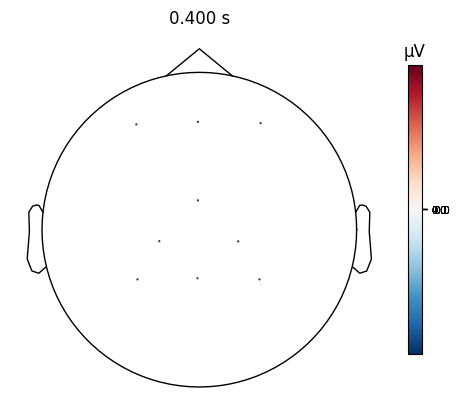

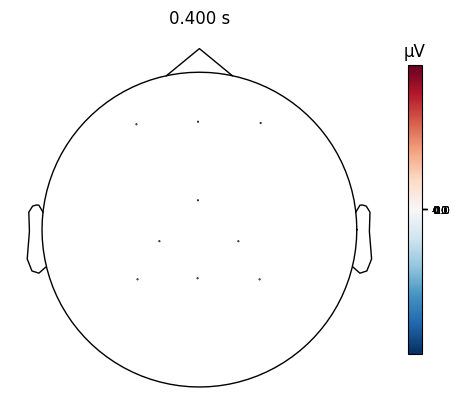

In [112]:
# Average ERPs
p300_evoked = epochs_p300.average()

# Plot P300 at 400ms
p300_evoked.plot_topomap(times=0.4, size=3, show=True)

In [113]:
print(epochs_p300.event_id)          # what codes you asked for?

{'2': 2, '4': 4, '5': 5, '6': 6}


In [114]:
epochs_p300

<Epochs | 99 events (good & bad), -0.5 – 1.5 s (baseline -0.2 – 0 s), ~29 KiB, data not loaded,
 '2': 50
 '4': 30
 '5': 5
 '6': 14>

In [115]:
print(len(epochs_p300))       # how many got picked up?

RuntimeError: Since bad epochs have not been dropped, the length of the Epochs is not known. Load the Epochs with preload=True, or call Epochs.drop_bad(). To find the number of events in the Epochs, use len(Epochs.events).

In [38]:
epochs_p300.drop_bad()
print("Surviving epochs:", len(epochs_p300))


Using data from preloaded Raw for 99 events and 501 original time points ...
99 bad epochs dropped
Surviving epochs: 0


C:\Users\suryansh\AppData\Local\Temp\ipykernel_4276\805206298.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs_p300.drop_bad()


In [39]:

from collections import Counter
print(Counter([tuple(r) for r in epochs_p300.drop_log]))


Counter({('IGNORED',): 327497, ('TOO_SHORT',): 99})


In [40]:
sfreq = raw_erp.info['sfreq']
event_times = events[:, 0] / sfreq
print("First few event times (s):", event_times[:5])
print("Last few event times (s):", event_times[-5:])
print("Recording runs from 0 to", raw_erp.times[-1], "seconds")


First few event times (s): [0. 2. 4. 6. 8.]
Last few event times (s): [655182. 655184. 655186. 655188. 655190.]
Recording runs from 0 to 654.996 seconds


In [90]:
epochs_p300 = mne.Epochs(raw_erp_clean, 
                         events_array, 
                         event_id=event_ids['P300'],
                         tmin=-0.5, 
                         tmax=1.5,
                         baseline=(-0.2, 0),
                         reject=None,
                         preload=True,
                         flat=None,           
                         picks=['Pz','Cz','P3','P4','Fz','CP1','CP2','F3','F4'])
print("Surviving epochs:", len(epochs_p300))

Not setting metadata
99 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 99 events and 501 original time points ...
99 bad epochs dropped
Surviving epochs: 0


C:\Users\suryansh\AppData\Local\Temp\ipykernel_4276\3611800641.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs_p300 = mne.Epochs(raw_erp_clean,


In [65]:
# Check for missing/flat channels
print("Channels in raw:", raw_erp_clean.ch_names)
print("Data range:", [f"{ch}: {np.ptp(raw_erp_clean.get_data(picks=ch))}" 
                     for ch in ['Pz','Cz','P3','P4','Fz','CP1','CP2','F3','F4']])

Channels in raw: ['P8', 'T8', 'CP6', 'FC6', 'F8', 'F4', 'C4', 'P4', 'AF4', 'Fp2', 'Fp1', 'AF3', 'Fz', 'FC2', 'Cz', 'CP2', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'Pz', 'CP1', 'FC1', 'P3', 'C3', 'F3', 'F7', 'FC5', 'CP5', 'T7', 'P7']
Data range: ['Pz: 0.008633720158703274', 'Cz: 0.008910793589088684', 'P3: 0.00895929543308941', 'P4: 0.004266938686051345', 'Fz: 0.004580790778062784', 'CP1: 0.009703128265053068', 'CP2: 0.004154837950126094', 'F3: 0.01142256798717714', 'F4: 0.004167069712773183']


In [51]:
from collections import Counter

# This shows exactly why each epoch was dropped
drop_reasons = Counter(tuple(r) for r in epochs_p300.drop_log)
print(drop_reasons)


Counter({('IGNORED',): 327497, ('TOO_SHORT',): 99})


In [62]:
# Verify data exists in baseline period
baseline_duration = 0.2  # seconds
tmin = -0.5  # seconds, start of epoch

sfreq = raw_erp_clean.info['sfreq']
baseline_samples = int(baseline_duration * sfreq)

print(f"Baseline requires {baseline_samples} samples")
print(f"First available sample: {raw_erp_clean.first_samp}")
print(f"Last available sample: {raw_erp_clean.last_samp}")

# Check if events allow baseline period
for event in events_array[:5]:  # Inspect first 5 events
    start_sample = event[0] + int(tmin * sfreq)
    print(f"Event sample: {event[0]} | Baseline start: {start_sample}")

Baseline requires 50 samples
First available sample: 0
Last available sample: 163749
Event sample: 0 | Baseline start: -125
Event sample: 500 | Baseline start: 375
Event sample: 1000 | Baseline start: 875
Event sample: 1500 | Baseline start: 1375
Event sample: 2000 | Baseline start: 1875


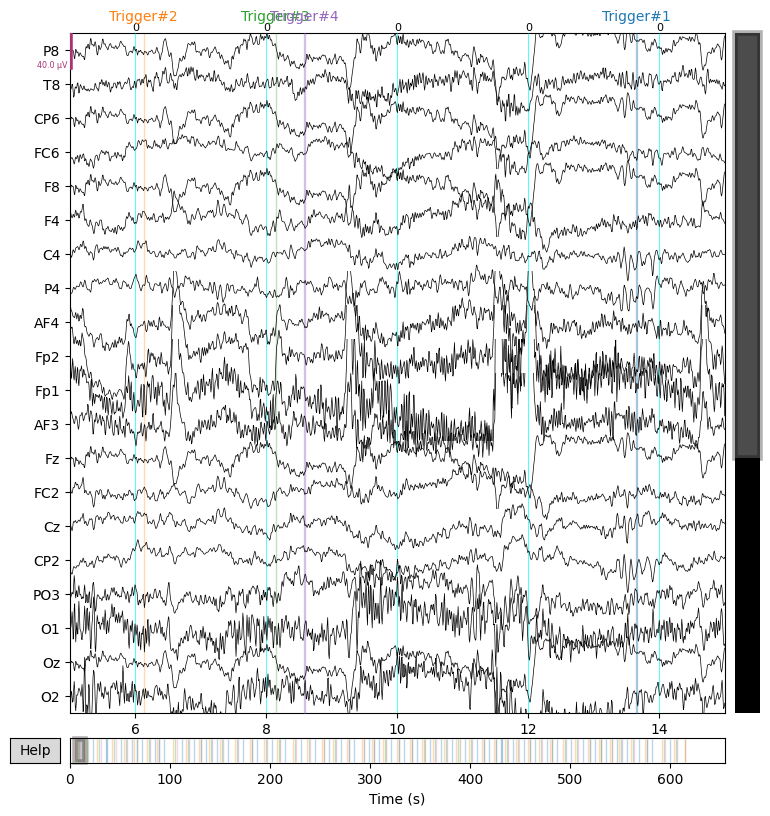

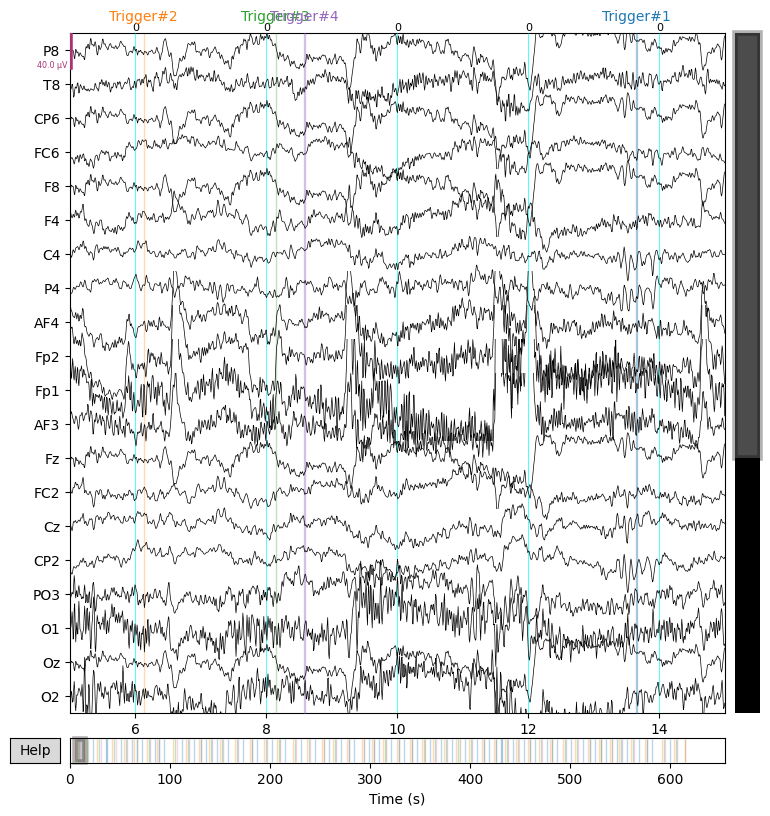

In [ ]:
raw_erp_clean.plot(events=events_array, start=5, duration=10)

In [72]:
epochs_p300


<Epochs | 0 events (all good), -0.2 – 1 s (baseline -0.2 – 0 s), ~29 KiB, data loaded,
 '2': 0
 '4': 0
 '5': 0
 '6': 0>

In [74]:
events_array[:, 0]  # Should contain sample numbers of triggers

array([        0,       500,      1000, ..., 163796500, 163797000,
       163797500], shape=(327596,))

In [78]:
print(raw_erp_clean.annotations)  # Verify stimulus markers match events_array

<Annotations | 197 segments: Trigger#1 (48), Trigger#2 (50), Trigger#3 ...>


In [87]:
# Check event-sample alignment
print(f"First sample: {raw.first_samp}, Last sample: {raw.last_samp}")
print(f"Event samples: {events[:, 0]}")

# Remove out-of-bound events
valid_events = events[(events[:, 0] >= raw.first_samp) & 
                     (events[:, 0] <= raw.last_samp)]

# Shift events if misaligned (example: 50 sample correction)
events[:, 0] = events[:, 0] + 50  # Adjust based on validation
print(f"Event samples: {events[:, 0]}")


First sample: 0, Last sample: 327499
Event samples: [       50       550      1050 ... 163796550 163797050 163797550]
Event samples: [      100       600      1100 ... 163796600 163797100 163797600]


In [88]:

events_array = np.array(events)

In [89]:
events_array

array([[      100,         0,         0],
       [      600,         0,         0],
       [     1100,         0,         0],
       ...,
       [163796600,         0,         0],
       [163797100,         0,         0],
       [163797600,         0,         0]], shape=(327596, 3))

C:\Users\suryansh\AppData\Local\Temp\ipykernel_11948\911947038.py:2: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  n200_evoked = epochs_n200.average()


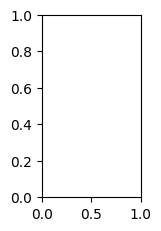

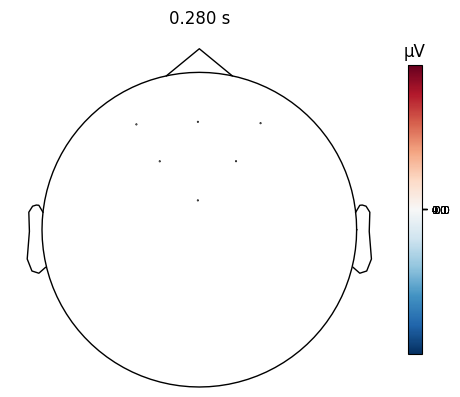

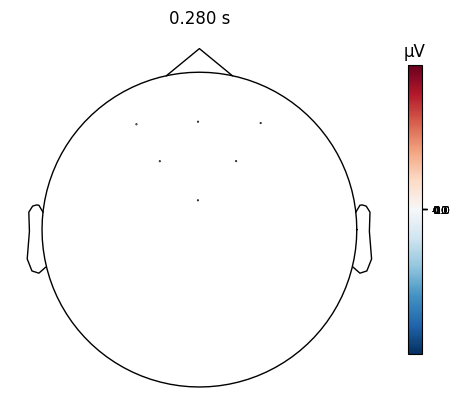

In [ ]:
# Average ERPs
n200_evoked = epochs_n200.average()

# Plot P300 at 400ms
n200_evoked.plot_topomap(times=0.28, size=3, show=True)

C:\Users\suryansh\AppData\Local\Temp\ipykernel_11948\1601375990.py:2: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  frn_evoked = epochs_frn.average()


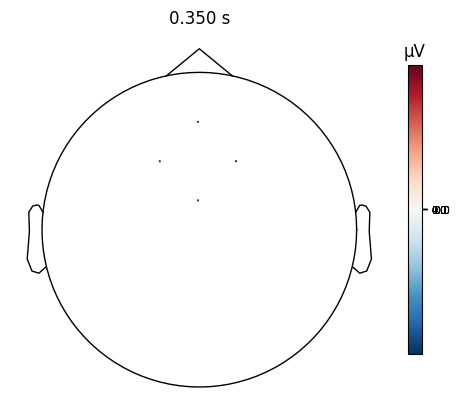

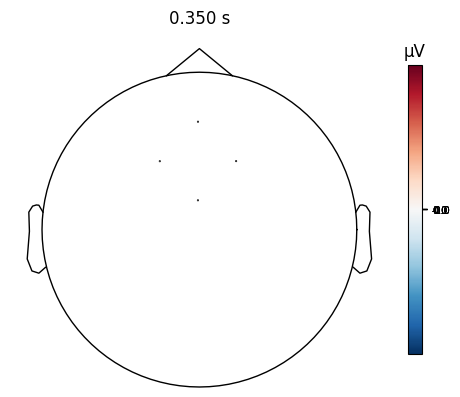

In [ ]:
# Average ERPs
frn_evoked = epochs_frn.average()

# Plot P300 at 400ms
frn_evoked.plot_topomap(times=0.35, size=3, show=True)

C:\Users\suryansh\AppData\Local\Temp\ipykernel_11948\3048632785.py:2: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  p300_evoked = epochs_p300.average()


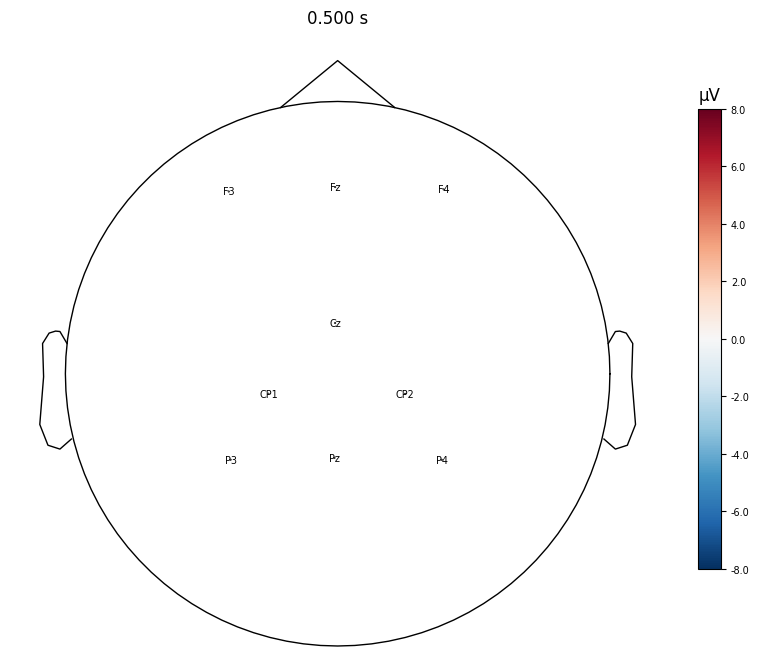

In [ ]:
# Average ERPs
p300_evoked = epochs_p300.average()

# Plot heatmap topomap at 400ms with enhanced settings
fig = p300_evoked.plot_topomap(times=0.5,
                               size=5,  # Increase size for better detail
                               cmap='RdBu_r',  # Red-Blue colormap (best for ERPs)
                               vlim=(-8, 8),  # Set symmetric color limits (adjust based on your data)
                               sensors=True,  # Show electrode positions
                               contours=0,  # No contour lines for cleaner heatmap
                               show_names=True,  # Show electrode names
                               extrapolate='box',  # Smooth interpolation
                               border='mean',  # Clean border style
                               res=128)  # Higher resolution for smoother map

# Customize the plot
fig.axes[0].set_title("P300 Activation at 400ms", fontsize=14)
fig.axes[0].set_xlabel("μV", fontsize=12)
fig.colorbar(fig.axes[0].images[0], ax=fig.axes[0], shrink=0.7, label='Amplitude (μV)')

In [ ]:
peak_idx = np.argmax(np.abs(p300_evoked.data).mean(axis=0))
peak_time = p300_evoked.times[peak_idx]
print(f"Actual peak at: {peak_time:.3f}s")

Actual peak at: -0.500s


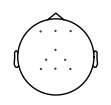

(<matplotlib.image.AxesImage at 0x1a573866050>, None)

In [ ]:
import numpy as np
from mne.viz import plot_topomap

# 1. Get your 400 ms amplitudes
time_idx = p300_evoked.time_as_index(-0.5)
data     = p300_evoked.data[:, time_idx].ravel()

# 2. Define “active” channels (e.g. top 10%)
threshold = np.percentile(data, 90)
mask      = data >= threshold

# 3. Build a color‐limit dict
#    kind='value' means [vmin, vcenter, vmax]
clim = dict(kind='value',
            lims=[data.min(),
                  np.median(data),
                  data.max()])

# 4. Plot the interpolated heatmap with your mask
plot_topomap(
    data,
    pos=p300_evoked.info,      # use your evoked’s channel locations
    cmap='RdBu_r',
    mask=mask,
    mask_params=dict(
        marker='o',
        markeredgewidth=1.5,
        markerfacecolor='w',
        markeredgecolor='k'
    ),
    contours=0,
    image_interp='cubic',
    res=128,
    
    show=True
)
